In [5]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Download required NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')  # Added to fix LookupError
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
# Sample dataset
data = {
    'review': [
        'The product is amazing and works perfectly!',
        'Terrible quality, broke after one use.',
        'Really happy with my purchase, great value.',
        'Not worth the money, very disappointing.',
        'Fantastic service and fast delivery!',
        'The item was damaged and customer service was unhelpful.',
        'Love this product, highly recommend it.',
        'Poor performance, expected much better.',
        'Exceeded my expectations, very satisfied.',
        'Waste of time and money, awful experience.'
    ],
    'sentiment': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
}

df = pd.DataFrame(data)

# Display the first few rows
df.head()

,review,sentiment
0,The product is amazing and works perfectly!,1
1,"Terrible quality, broke after one use.",0
2,"Really happy with my purchase, great value.",1
3,"Not worth the money, very disappointing.",0
4,Fantastic service and fast delivery!,1


In [8]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back to string
    return ' '.join(tokens)

# Apply preprocessing
df['cleaned_review'] = df['review'].apply(preprocess_text)

# Display the cleaned data
df[['review', 'cleaned_review', 'sentiment']].head()

,review,cleaned_review,sentiment
0,The product is amazing and works perfectly!,product amazing work perfectly,1
1,"Terrible quality, broke after one use.",terrible quality broke one use,0
2,"Really happy with my purchase, great value.",really happy purchase great value,1
3,"Not worth the money, very disappointing.",worth money disappointing,0
4,Fantastic service and fast delivery!,fantastic service fast delivery,1


In [9]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000, min_df=2, max_df=0.8)

# Transform the cleaned reviews
X = tfidf.fit_transform(df['cleaned_review']).toarray()
y = df['sentiment']

# Display the shape of the feature matrix
print(f'Feature matrix shape: {X.shape}')

Feature matrix shape: (10, 3)


In [10]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the sizes of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Testing set size: {X_test.shape[0]} samples')

Training set size: 8 samples
Testing set size: 2 samples


In [11]:
# Initialize and train the model忙
# Initialize and train the model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Display a confirmation
print('Model training completed.')

Model training completed.


Accuracy: 0.50

Classification Report:
              precision    recall  f1-score   support

    Negative       0.50      1.00      0.67         1
    Positive       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

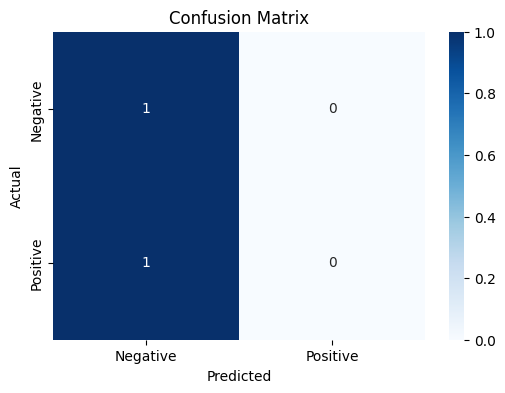

In [12]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
# New reviews to predict
new_reviews = [
    'This product is fantastic and works as expected!',
    'Really disappointed with the quality, broke quickly.'
]

# Preprocess new reviews
cleaned_new_reviews = [preprocess_text(review) for review in new_reviews]

# Transform using the same TF-IDF vectorizer
X_new = tfidf.transform(cleaned_new_reviews).toarray()

# Predict sentiment
predictions = model.predict(X_new)

# Display results
for review, pred in zip(new_reviews, predictions):
    sentiment = 'Positive' if pred == 1 else 'Negative'
    print(f'Review: {review}')
    print(f'Predicted Sentiment: {sentiment}\n')

Review: This product is fantastic and works as expected!
Predicted Sentiment: Positive

Review: Really disappointed with the quality, broke quickly.
Predicted Sentiment: Negative

